## Wrangle and Analyze Data

## Table of Contents
- [Introduction](#intro)
- [Gathering Data](#Gathering)
- [Assessing Data](#Assessing)
    - [Visual Assessment](#visual)
    - [Programatic Assessment](#Program)
- [Cleaning Data](#cleaning)
- [Storing Data ](#storing)
- [Analyzing & Visualization](#SAV)
- [Resources](#resources)


<a id='intro'></a>
### Introduction

The goal of this wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. It has over 4 million followers and has received international media coverage.



<a id='Gathering'></a>
### Gathering Data

Twitter archive file: download this file manually from the following file: twitter_archive_enhanced.csv

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

Twitter API & JSON: Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
import os
import time
from datetime import datetime
import seaborn as sns


#### 1. Twitter archive file

In [2]:
# Read CSV file into DataFrame - WeRateDogs Twitter archive
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')
twitter_arch.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

#### 2. Twitter tsv file - Image Predictions

In [3]:
# Import & write Image Predictions 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)

with open(os.path.join('image_predictions.tsv'), 'wb') as file:
    file.write(response.content)
    
# Read Image Predictions 
predictions = pd.read_csv('image_predictions.tsv', sep = '\t', encoding = 'utf-8')
predictions.sample(5)

tweet_id                                            jpg_url  \
2032  883360690899218434    https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg   
1402  768970937022709760  https://pbs.twimg.com/ext_tw_video_thumb/76896...   
1209  742423170473463808    https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg   
151   668643542311546881    https://pbs.twimg.com/media/CUd_wYRWUAAZsKr.jpg   
1229  745433870967832576    https://pbs.twimg.com/media/ClhQJUUWAAEVpBX.jpg   

      img_num             p1   p1_conf  p1_dog                 p2   p2_conf  \
2032        1           chow  0.987997    True    Tibetan_mastiff  0.007099   
1402        1     Pomeranian  0.182358    True   golden_retriever  0.110658   
1209        1            pug  0.997310    True  Brabancon_griffon  0.001186   
151         1  common_iguana  0.483972   False     frilled_lizard  0.111377   
1229        1         barrow  0.999962   False             basset  0.000014   

      p2_dog              p3   p3_conf  p3_dog  
2032    True    Newfoundland  0.002140    True  
1402    True       mousetrap  0.086399   False  
1209    True  French_bulldog  0.000428    True  
151    False         sandbar  0.078983   False  
1229    True             wok  0.000006   False

#### 3. Data scraping through Twitter API & JSON

In [4]:
#Details to be deleted

# Load Twitter API
consumer_key = 'GrXZeY4E80HPcLuFiOlTzL34Z'
consumer_secret = 'wTP5lde71qg8AYsmAgfLejCkXeJPGwajdAvQje2ZYX5PUxAAST'
access_token = '3660212963-oVa2U3bdCAMO4pKcUfTn8A80BjDenxzxwrdcndX'
access_secret = 'tIhzVQqUFU2R529zgxIJQucjmRVQ9npl608gHeCxpzfYq'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [5]:
tweet_ids = list(twitter_arch['tweet_id'])

t = time.process_time()

# Store Twitter API data
with open('tweet_json.txt', 'w') as file:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, 
                                   tweet_mode = 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
            print(tweet_id)
        except Exception as e:
            print(e)

elapsed_time = time.process_time()-t
print(elapsed_time)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
[{'code': 144, 'message': 'No status found with that ID.'}]
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270

825120256414846976
825026590719483904
824796380199809024
824775126675836928
824663926340194305
824325613288833024
824297048279236611
824025158776213504
823939628516474880
823719002937630720
823699002998870016
823581115634085888
823333489516937216
823322678127919110
823269594223824897
822975315408461824
822872901745569793
822859134160621569
822647212903690241
822610361945911296
822489057087389700
822462944365645825
822244816520155136
822163064745328640
821886076407029760
821813639212650496
821765923262631936
821522889702862852
821421320206483457
821407182352777218
821153421864615936
821149554670182400
821107785811234820
821044531881721856
820837357901512704
820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107

770655142660169732
770414278348247044
770293558247038976
770093767776997377
770069151037685760
769940425801170949
769695466921623552
769335591808995329
769212283578875904
768970937022709760
768909767477751808
768855141948723200
768609597686943744
768596291618299904
768554158521745409
768473857036525572
768193404517830656
767884188863397888
767754930266464257
767500508068192258
767191397493538821
767122157629476866
766864461642756096
766793450729734144
766714921925144576
766693177336135680
766423258543644672
766313316352462849
766078092750233600
766069199026450432
766008592277377025
765719909049503744
765669560888528897
765395769549590528
765371061932261376
765222098633691136
764857477905154048
764259802650378240
763956972077010945
763837565564780549
763183847194451968
763167063695355904
763103485927849985
762699858130116608
762471784394268675
762464539388485633
762316489655476224
762035686371364864
761976711479193600
761750502866649088
761745352076779520
761672994376806400
761599872357

Rate limit reached. Sleeping for: 511


758740312047005698
758474966123810816
758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151549440
756939218950160384
756651752796094464
756526248105566208
756303284449767430
756288534030475264
756275833623502848
755955933503782912
755206590534418437
755110668769038337
754874841593970688
754856583969079297
754747087846248448
754482103782404096
754449512966619136
754120377874386944
[{'code': 144, 'message': 'No status found with that ID.'}]
753655901052166144
753420520834629632
753398408988139520
753375668877008896
753298634498793472
753294487569522689
753039830821511168
753026973505581056
752932432744185856
752917284578922496
752701944171524096
752682090207055872
752660715232722944
752568224206688256
752519690950500352
752334515931054080
752309394570878976
752173152

705786532653883392
705591895322394625
705475953783398401
705442520700944385
705428427625635840
705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748819968
704134088924532736
704113298707505153
704054845121142784
703774238772166656
703769065844768768
703631701117943808
703611486317502464
703425003149250560
703407252292673536
703382836347330562
703356393781329922
703268521220972544
703079050210877440
703041949650034688
702932127499816960
702899151802126337
702684942141153280
702671118226825216
702598099714314240
702539513671897089
702332542343577600
702321140488925184
702276748847800320
702217446468493312
701981390485725185
701952816642965504
701889187134500865
701805642395348998
701601587219795968
701570477911896070
701545186879471618
701214700881756160
700890391244103680
700864154249

678708137298427904
678675843183484930
678643457146150913
678446151570427904
678424312106393600
678410210315247616
678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514703872
677895101218201600
677716515794329600
677700003327029250
677698403548192770
677687604918272002
677673981332312066
677662372920729601
677644091929329666
677573743309385728
677565715327688705
677557565589463040
677547928504967168
677530072887205888
677335745548390400
677334615166730240
677331501395156992
677328882937298944
677314812125323265
677301033169788928
677269281705472000
677228873407442944
677187300187611136


Rate limit reached. Sleeping for: 540


676975532580409345
676957860086095872
676949632774234114
676948236477857792
676946864479084545
676942428000112642
676936541936185344
676916996760600576
676897532954456065
676864501615042560
676821958043033607
676819651066732545
676811746707918848
676776431406465024
676617503762681856
676613908052996102
676606785097199616
676603393314578432
676593408224403456
676590572941893632
676588346097852417
676582956622721024
676575501977128964
676533798876651520
676496375194980353
676470639084101634
676440007570247681
676430933382295552
676263575653122048
676237365392908289
676219687039057920
676215927814406144
676191832485810177
676146341966438401
676121918416756736
676101918813499392
676098748976615425
676089483918516224
675898130735476737
675891555769696257
675888385639251968
675878199931371520
675870721063669760
675853064436391936
675849018447167488
675845657354215424
675822767435051008
675820929667219457
675798442703122432
675781562965868544
675740360753160193
675710890956750848
675707330206

668221241640230912
668204964695683073
668190681446379520
668171859951755264
668154635664932864
668142349051129856
668113020489474048
667937095915278337
667924896115245057
667915453470232577
667911425562669056
667902449697558528
667886921285246976
667885044254572545
667878741721415682
667873844930215936
667866724293877760
667861340749471744
667832474953625600
667806454573760512
667801013445750784
667793409583771648
667782464991965184
667773195014021121
667766675769573376
667728196545200128
667724302356258817
667550904950915073
667550882905632768
667549055577362432
667546741521195010
667544320556335104
667538891197542400
667534815156183040
667530908589760512
667524857454854144
667517642048163840
667509364010450944
667502640335572993
667495797102141441
667491009379606528
667470559035432960
667455448082227200
667453023279554560
667443425659232256
667437278097252352
667435689202614272
667405339315146752
667393430834667520
667369227918143488
667211855547486208
667200525029539841
667192066997

In [6]:
# Load Twitter API data
df_list = []

with open('tweet_json.txt', 'r', encoding='utf8') as f:
    for line in f:
        tweet_line = json.loads(line)
        df_list.append({'tweet_id': tweet_line['id'],
                        'favorites': tweet_line['favorite_count'],
                        'retweets': tweet_line['retweet_count']})
        
twitter_api = pd.DataFrame(df_list)
print(twitter_api)

      favorites  retweets            tweet_id
0         37095      7923  892420643555336193
1         31917      5886  892177421306343426
2         24029      3888  891815181378084864
3         40415      8080  891689557279858688
4         38636      8759  891327558926688256
5         19414      2912  891087950875897856
6         11331      1929  890971913173991426
7         62576     17675  890729181411237888
8         26716      4011  890609185150312448
9         30598      6894  890240255349198849
10        29451      6864  890006608113172480
11        26723      4672  889880896479866881
12        46099      9400  889665388333682689
13        25990      4220  889638837579907072
14        14505      2113  889531135344209921
15        24186      5018  889278841981685760
16        27927      4211  888917238123831296
17        24528      3988  888804989199671297
18        18992      3288  888554962724278272
19        20863      3258  888078434458587136
20        28985      5044  8877052

<a id='Assessing'></a>
### Assessing Data

<a id='visual'></a>
#### Visual Assessment

In [7]:
# Display the Twitter Archive File
twitter_arch

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

The file includes 2,356 rows and 17 columns as follows:
- **tweet_id**: The unique identifier for each tweet
- **in_reply_to_status_id**: If the represented Tweet is a reply, this attribute is the original Tweet’s ID
- **in_reply_to_user_id**: If the represented Tweet is a reply, this attribute is the original Tweet’s author ID. This will not necessarily always be the user directly mentioned in the Tweet
- **timestamp**: Date & time when the tweet has been sent
- **source**: Utility used to post the Tweet
- **text**: The actual UTF-8 text of the status update
- **retweeted_status_id / retweeted_status_user_id / retweeted_status_timestamp**: These attributes represent the retweet's ID and retweet's author id. 
- **expanded_urls**: URL where the tweet can be found
- **rating_numerator**: The top number of a fraction
- **rating_denominator**: The bottom number of a fraction
- **name**: The name of the dog
- **doggo / floofer / pupper / puppo**: Dog stages

In [8]:
# Display the Image Predictions File
predictions

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

The file includes 2,075 rows and 12 columns as follows:

- **tweet_id**: The last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
- **jpg_URL**: Where the image is hosted
- **img_num**: Image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
- **p1**: Algorithm's #1 prediction for the image in the tweet → golden retriever
- **p1_conf**: How confident the algorithm is in its #1 prediction → 95%
- **p1_dog**: Whether or not the #1 prediction is a breed of dog → TRUE
- **p2**: Algorithm's second most likely prediction → Labrador retriever
- **p2_conf**: How confident the algorithm is in its #2 prediction → 1%
- **p2_dog**: Whether or not the #2 prediction is a breed of dog → TRUE

In [9]:
# Display Twitter Data from the API
twitter_api

favorites  retweets            tweet_id
0         37095      7923  892420643555336193
1         31917      5886  892177421306343426
2         24029      3888  891815181378084864
3         40415      8080  891689557279858688
4         38636      8759  891327558926688256
5         19414      2912  891087950875897856
6         11331      1929  890971913173991426
7         62576     17675  890729181411237888
8         26716      4011  890609185150312448
9         30598      6894  890240255349198849
10        29451      6864  890006608113172480
11        26723      4672  889880896479866881
12        46099      9400  889665388333682689
13        25990      4220  889638837579907072
14        14505      2113  889531135344209921
15        24186      5018  889278841981685760
16        27927      4211  888917238123831296
17        24528      3988  888804989199671297
18        18992      3288  888554962724278272
19        20863      3258  888078434458587136
20        28985      5044  887705289381826560
21        44439     10993  887517139158093824
22        66080     16895  887473957103951883
23        32297      9798  887343217045368832
24        29330      5578  887101392804085760
25        33640      7189  886983233522544640
26        11527      3034  886736880519319552
27        21514      4175  886680336477933568
28        20293      2988  886366144734445568
29          115         4  886267009285017600
...         ...       ...                 ...
2303        423       314  666411507551481857
2304        101        35  666407126856765440
2305        160        80  666396247373291520
2306        177        86  666373753744588802
2307        744       535  666362758909284353
2308        209        71  666353288456101888
2309        280       129  666345417576210432
2310        186        86  666337882303524864
2311        476       327  666293911632134144
2312        140        63  666287406224695296
2313        164        74  666273097616637952
2314         98        32  666268910803644416
2315      13756      6147  666104133288665088
2316         74        11  666102155909144576
2317        145        63  666099513787052032
2318        157        68  666094000022159362
2319        107        42  666082916733198337
2320        306       150  666073100786774016
2321        137        54  666071193221509120
2322        455       202  666063827256086533
2323        106        56  666058600524156928
2324        276       131  666057090499244032
2325        417       225  666055525042405380
2326       1163       801  666051853826850816
2327        126        56  666050758794694657
2328        101        41  666049248165822465
2329        280       135  666044226329800704
2330        119        43  666033412701032449
2331        123        45  666029285002620928
2332       2475       479  666020888022790149

[2333 rows x 3 columns]

This file includes originally 2,333 rows and 8 columns as follows - however, favorites, retweets and tweet_id columns are put in the data frame for analysis purpose:

- **favorites**: Number of likes
- **retweets**: Number of times this Tweet has been retweeted
- **tweet_id**: The unique identifier for each tweet

<a id='Program'></a>
#### Programatic Assessment
##### twitter_arch (CSV File)

In [10]:
twitter_arch.head(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [11]:
twitter_arch.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
821   770293558247038976                    NaN                  NaN   
68    879130579576475649                    NaN                  NaN   
1760  678708137298427904                    NaN                  NaN   
2200  668655139528511488                    NaN                  NaN   
406   823719002937630720                    NaN                  NaN   

                      timestamp  \
821   2016-08-29 16:14:30 +0000   
68    2017-06-26 00:13:58 +0000   
1760  2015-12-20 22:46:44 +0000   
2200  2015-11-23 04:59:42 +0000   
406   2017-01-24 02:28:08 +0000   

                                                 source  \
821   <a href="http://twitter.com/download/iphone" r...   
68    <a href="http://twitter.com/download/iphone" r...   
1760  <a href="http://vine.co" rel="nofollow">Vine -...   
2200  <a href="http://twitter.com/download/iphone" r...   
406   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
821   This is Jackson. There's nothing abnormal abou...                  NaN   
68    RT @dog_rates: This is Emmy. She was adopted t...         8.780576e+17   
1760  Here we are witnessing a wild field pupper. Lo...                  NaN   
2200  Say hello to Winifred. He is a Papyrus Hydrang...                  NaN   
406   RT @dog_rates: This is Balto. He's very conten...         7.840579e+17   

      retweeted_status_user_id retweeted_status_timestamp  \
821                        NaN                        NaN   
68                4.196984e+09  2017-06-23 01:10:23 +0000   
1760                       NaN                        NaN   
2200                       NaN                        NaN   
406               4.196984e+09  2016-10-06 15:49:14 +0000   

                                          expanded_urls  rating_numerator  \
821   https://twitter.com/dog_rates/status/770293558...                10   
68    https://twitter.com/dog_rates/status/878057613...                14   
1760                      https://vine.co/v/eQjxxYaQ60K                10   
2200  https://twitter.com/dog_rates/status/668655139...                11   
406   https://vine.co/v/5gKxeUpuKEr,https://vine.co/...                12   

      rating_denominator      name doggo floofer  pupper puppo  
821                   10   Jackson  None    None    None  None  
68                    10      Emmy  None    None    None  None  
1760                  10      None  None    None  pupper  None  
2200                  10  Winifred  None    None    None  None  
406                   10     Balto  None    None    None  None

In [12]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
twitter_arch.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [14]:
twitter_arch.tweet_id.duplicated().sum()

0

In [15]:
# Look text including ratings with a decimal numerator up
twitter_arch.loc[twitter_arch.text.str.contains(r"(\d+\.\d*\/\d+)")].text

C:\Users\ganip\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


45      This is Bella. She hopes her smile made you sm...
340     RT @dog_rates: This is Logan, the Chow who liv...
695     This is Logan, the Chow who lived. He solemnly...
763     This is Sophie. She's a Jubilant Bush Pupper. ...
1689    I've been told there's a slight possibility he...
1712    Here we have uncovered an entire battalion of ...
Name: text, dtype: object

In [16]:
# Check rating numerator in text VS numerator column
twitter_arch[twitter_arch['text'].str.contains('\d+\.\d+/\d+')]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
45    883482846933004288                    NaN                  NaN   
340   832215909146226688                    NaN                  NaN   
695   786709082849828864                    NaN                  NaN   
763   778027034220126208                    NaN                  NaN   
1689  681340665377193984           6.813394e+17         4.196984e+09   
1712  680494726643068929                    NaN                  NaN   

                      timestamp  \
45    2017-07-08 00:28:19 +0000   
340   2017-02-16 13:11:49 +0000   
695   2016-10-13 23:23:56 +0000   
763   2016-09-20 00:24:34 +0000   
1689  2015-12-28 05:07:27 +0000   
1712  2015-12-25 21:06:00 +0000   

                                                 source  \
45    <a href="http://twitter.com/download/iphone" r...   
340   <a href="http://twitter.com/download/iphone" r...   
695   <a href="http://twitter.com/download/iphone" r...   
763   <a href="http://twitter.com/download/iphone" r...   
1689  <a href="http://twitter.com/download/iphone" r...   
1712  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
45    This is Bella. She hopes her smile made you sm...                  NaN   
340   RT @dog_rates: This is Logan, the Chow who liv...         7.867091e+17   
695   This is Logan, the Chow who lived. He solemnly...                  NaN   
763   This is Sophie. She's a Jubilant Bush Pupper. ...                  NaN   
1689  I've been told there's a slight possibility he...                  NaN   
1712  Here we have uncovered an entire battalion of ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
45                         NaN                        NaN   
340               4.196984e+09  2016-10-13 23:23:56 +0000   
695                        NaN                        NaN   
763                        NaN                        NaN   
1689                       NaN                        NaN   
1712                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
45    https://twitter.com/dog_rates/status/883482846...                 5   
340   https://twitter.com/dog_rates/status/786709082...                75   
695   https://twitter.com/dog_rates/status/786709082...                75   
763   https://twitter.com/dog_rates/status/778027034...                27   
1689                                                NaN                 5   
1712  https://twitter.com/dog_rates/status/680494726...                26   

      rating_denominator    name doggo floofer  pupper puppo  
45                    10   Bella  None    None    None  None  
340                   10   Logan  None    None    None  None  
695                   10   Logan  None    None    None  None  
763                   10  Sophie  None    None  pupper  None  
1689                  10    None  None    None    None  None  
1712                  10    None  None    None    None  None

In [17]:
# Check all numerator that are not 10
twitter_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
twitter_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
# Look at dog's name
twitter_arch.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Oliver         11
Cooper         11
Penny          10
Tucker         10
Lola           10
Bo              9
Winston         9
the             8
Sadie           8
Bailey          7
Toby            7
an              7
Buddy           7
Daisy           7
Scout           6
Bella           6
Koda            6
Dave            6
Stanley         6
Rusty           6
Jax             6
Leo             6
Milo            6
Oscar           6
Jack            6
Larry           5
             ... 
Kramer          1
Mo              1
Monkey          1
Vince           1
Deacon          1
Noosh           1
Heinrich        1
Ito             1
Chase           1
Harlso          1
Reagan          1
Rascal          1
Thor            1
JD              1
Miguel          1
Marq            1
Griswold        1
Finnegus        1
Brandonald      1
Godi            1
Pubert          1
Rontu           1
Jeffri          1
Aja             1
Kingsley  

In [20]:
# Look at dog's names with a lowercase - likely not a real name
twitter_arch.loc[(twitter_arch.name.str.islower())]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
22    887517139158093824                    NaN                  NaN   
56    881536004380872706                    NaN                  NaN   
118   869988702071779329                    NaN                  NaN   
169   859196978902773760                    NaN                  NaN   
193   855459453768019968                    NaN                  NaN   
335   832645525019123713                    NaN                  NaN   
369   828650029636317184                    NaN                  NaN   
542   806219024703037440                    NaN                  NaN   
649   792913359805018113                    NaN                  NaN   
682   788552643979468800                    NaN                  NaN   
759   778396591732486144                    NaN                  NaN   
773   776249906839351296                    NaN                  NaN   
801   772581559778025472                    NaN                  NaN   
819   770655142660169732                    NaN                  NaN   
822   770093767776997377                    NaN                  NaN   
852   765395769549590528                    NaN                  NaN   
924   755206590534418437                    NaN                  NaN   
988   748977405889503236                    NaN                  NaN   
992   748692773788876800                    NaN                  NaN   
993   748575535303884801                    NaN                  NaN   
1002  747885874273214464                    NaN                  NaN   
1004  747816857231626240                    NaN                  NaN   
1017  746872823977771008                    NaN                  NaN   
1025  746369468511756288                    NaN                  NaN   
1031  745422732645535745                    NaN                  NaN   
1040  744223424764059648                    NaN                  NaN   
1049  743222593470234624                    NaN                  NaN   
1063  741067306818797568                    NaN                  NaN   
1071  740214038584557568                    NaN                  NaN   
1095  736392552031657984                    NaN                  NaN   
...                  ...                    ...                  ...   
2191  668955713004314625                    NaN                  NaN   
2198  668815180734689280                    NaN                  NaN   
2204  668636665813057536                    NaN                  NaN   
2211  668614819948453888                    NaN                  NaN   
2212  668587383441514497                    NaN                  NaN   
2218  668507509523615744                    NaN                  NaN   
2222  668466899341221888                    NaN                  NaN   
2235  668171859951755264                    NaN                  NaN   
2249  667861340749471744                    NaN                  NaN   
2255  667773195014021121                    NaN                  NaN   
2264  667538891197542400                    NaN                  NaN   
2273  667470559035432960                    NaN                  NaN   
2287  667177989038297088                    NaN                  NaN   
2304  666983947667116034                    NaN                  NaN   
2311  666781792255496192                    NaN                  NaN   
2314  666701168228331520                    NaN                  NaN   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN         

In [21]:
# Look up number of retweets 
len((twitter_arch[twitter_arch['text'].str.startswith('RT') == True]))

183

In [22]:
# Look for name included in the text column but not in the name column
twitter_arch[twitter_arch['text'].str.contains('names are|name to')]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
149   863079547188785154           6.671522e+17         4.196984e+09   
2306  666835007768551424                    NaN                  NaN   

                      timestamp  \
149   2017-05-12 17:12:53 +0000   
2306  2015-11-18 04:27:09 +0000   

                                                 source  \
149   <a href="http://twitter.com/download/iphone" r...   
2306  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
149   Ladies and gentlemen... I found Pipsy. He may ...                  NaN   
2306  These are Peruvian Feldspars. Their names are ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
149                        NaN                        NaN   
2306                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
149   https://twitter.com/dog_rates/status/863079547...                14   
2306  https://twitter.com/dog_rates/status/666835007...                10   

      rating_denominator  name doggo floofer pupper puppo  
149                   10  None  None    None   None  None  
2306                  10  None  None    None   None  None

In [23]:
# Look for tweets with no image
twitter_arch['expanded_urls'].isnull().value_counts()

False    2297
True       59
Name: expanded_urls, dtype: int64

#### Predictions (.tsv file)

In [24]:
predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [25]:
predictions.sample(5)

tweet_id                                          jpg_url  \
1961  866450705531457537  https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg   
1740  822489057087389700  https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg   
808   692142790915014657  https://pbs.twimg.com/media/CZr8LvyXEAABJ9k.jpg   
622   680497766108381184  https://pbs.twimg.com/media/CXGdG0aWcAEbOO1.jpg   
1688  815390420867969024  https://pbs.twimg.com/media/C1DZQiTXgAUqgRI.jpg   

      img_num              p1   p1_conf  p1_dog           p2   p2_conf  \
1961        2  French_bulldog  0.905334    True  Boston_bull  0.078060   
1740        1         Samoyed  0.416769    True     malamute  0.252706   
808         3      toy_poodle  0.670068    True        teddy  0.190898   
622         1       Chihuahua  0.538354    True       muzzle  0.084289   
1688        1      restaurant  0.279846   False      toyshop  0.091429   

      p2_dog                p3   p3_conf  p3_dog  
1961    True               pug  0.001771    True  
1740    True            kuvasz  0.157028    True  
808    False  miniature_poodle  0.032178    True  
622    False          ski_mask  0.076690   False  
1688   False       paper_towel  0.046147   False

In [26]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [28]:
predictions.tweet_id.duplicated().sum()

0

In [29]:
# Count images based on the image prediction ranking
predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

 #### twitter_api (json file) 

In [30]:
twitter_api.head()

favorites  retweets            tweet_id
0      37095      7923  892420643555336193
1      31917      5886  892177421306343426
2      24029      3888  891815181378084864
3      40415      8080  891689557279858688
4      38636      8759  891327558926688256

In [31]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
favorites    2333 non-null int64
retweets     2333 non-null int64
tweet_id     2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [32]:
twitter_api.describe()

favorites      retweets      tweet_id
count    2333.000000   2333.000000  2.333000e+03
mean     7735.992285   2788.792542  7.419279e+17
std     12009.642740   4720.919158  6.820607e+16
min         0.000000      1.000000  6.660209e+17
25%      1339.000000    560.000000  6.782786e+17
50%      3368.000000   1302.000000  7.184547e+17
75%      9497.000000   3245.000000  7.986654e+17
max    160300.000000  80149.000000  8.924206e+17

Here are the tidiness and quality issues that we could notice:

#### Tidiness Issues:
- Merging the three dataframes into one using tweet_id with a (inner) join condition
- Joining the dog stages into a single column instead of four
- Unnecessary columns to be deleted.


#### Quality Issues:

- Tweet_id, timestamp, sources, img_num and dog_stages need to be converted into the right datatype
- Sources to be clearly defined such as Twitter for iPhone, Twitter Web Client, TweetDeck
- Dog name is not always accurate: 'a', 'actually', 'all', 'by', 'getting' etc
- Replace missing values in the dog stages column as 'None'
- Deleting the retweets
- Create the rating column with numerator/denominator and drop separate num and denom coulumns.
- Delete tweets that don't include images
- First letter of some breeds is uppercase change to lowercase.

<a id='cleaning'></a>
### Cleaning Data

In [33]:
# Copies of the original pieces of data
df1 = twitter_arch.copy()
df2 = predictions.copy()
df3 = twitter_api.copy()

#### Tidiness issue # 1
Merging the dataframes into one:

In [34]:
df_final =pd.merge(pd.merge(df1,df2,on='tweet_id'),df3,on='tweet_id')

In [35]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 30 columns):
tweet_id                      2061 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2061 non-null object
source                        2061 non-null object
text                          2061 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2061 non-null object
rating_numerator              2061 non-null int64
rating_denominator            2061 non-null int64
name                          2061 non-null object
doggo                         2061 non-null object
floofer                       2061 non-null object
pupper                        2061 non-null object
puppo                         2061 non-null object
jpg_url                       2061 

In [36]:
df_final.to_csv('twitter_archive_master.csv', index=False)

In [37]:
master_file = pd.read_csv('twitter_archive_master.csv')

In [38]:
master_file.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2049  666071193221509120                    NaN                  NaN   
132   860524505164394496                    NaN                  NaN   
363   817120970343411712                    NaN                  NaN   
1558  675870721063669760           6.757073e+17         4.196984e+09   
286   828408677031882754                    NaN                  NaN   

                      timestamp  \
2049  2015-11-16 01:52:02 +0000   
132   2017-05-05 16:00:04 +0000   
363   2017-01-05 21:29:55 +0000   
1558  2015-12-13 02:51:51 +0000   
286   2017-02-06 01:03:14 +0000   

                                                 source  \
2049  <a href="http://twitter.com/download/iphone" r...   
132   <a href="http://twitter.com/download/iphone" r...   
363   <a href="http://twitter.com/download/iphone" r...   
1558  <a href="http://twitter.com/download/iphone" r...   
286   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2049  Here we have a northern speckled Rhododendron....                  NaN   
132   This is Carl. He likes to dance. Doesn't care ...                  NaN   
363   Name a more iconic quartet... I'll wait. 13/10...                  NaN   
1558  &amp; this is Yoshi. Another world record cont...                  NaN   
286   This is Bear. He went outside to play in the s...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2049                       NaN                        NaN   
132                        NaN                        NaN   
363                        NaN                        NaN   
1558                       NaN                        NaN   
286                        NaN                        NaN   

                                          expanded_urls  ...   p1_conf  \
2049  https://twitter.com/dog_rates/status/666071193...  ...  0.503672   
132   https://twitter.com/dog_rates/status/860524505...  ...  0.286558   
363   https://twitter.com/dog_rates/status/817120970...  ...  0.568809   
1558  https://twitter.com/dog_rates/status/675870721...  ...  0.263892   
286   https://twitter.com/dog_rates/status/828408677...  ...  0.133033   

      p1_dog                        p2   p2_conf p2_dog  \
2049    True         Yorkshire_terrier  0.174201   True   
132     True                toy_poodle  0.235193   True   
363     True              Afghan_hound  0.229352   True   
1558    True    Welsh_springer_spaniel  0.184193   True   
286     True  Chesapeake_Bay_retriever  0.092227   True   

                                  p3   p3_conf p3_dog  favorites retweets  
2049                        Pekinese  0.109454   True        137       54  
132                 Lakeland_terrier  0.087951   True      23219     5155  
363                 golden_retriever  0.157130   True      12684     2721  
1558                          beagle  0.182241   True       1642      569  
286   American_Staffordshire_terrier  0.065094   True       7915     1337  

[5 rows x 30 columns]

#### Tidiness issue # 2
Joining the dog stages into a single column:

In [39]:
# Create and merge dog stages into one column
master_file['dog_stages'] = master_file.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

# Drop the unnecessary columns
master_file.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

In [40]:
master_file.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
815   747594051852075008                    NaN                  NaN   
1110  704871453724954624           6.671522e+17         4.196984e+09   
95    870308999962521604                    NaN                  NaN   
819   747204161125646336                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   

                      timestamp  \
815   2016-06-28 00:54:46 +0000   
1110  2016-03-02 03:30:25 +0000   
95    2017-06-01 16:00:09 +0000   
819   2016-06-26 23:05:29 +0000   
4     2017-07-29 16:00:24 +0000   

                                                 source  \
815   <a href="http://twitter.com/download/iphone" r...   
1110  <a href="http://twitter.com/download/iphone" r...   
95    <a href="http://twitter.com/download/iphone" r...   
819   <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
815   Again w the sharks guys. This week is about do...                  NaN   
1110  I found a forest Pipsy. 12/10 https://t.co/mIQ...                  NaN   
95    This is Rumble, but he's not ready to. Would r...                  NaN   
819   This is Clark. He's deadly af. Clearly part sh...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
815                        NaN                        NaN   
1110                       NaN                        NaN   
95                         NaN                        NaN   
819                        NaN                        NaN   
4                          NaN                        NaN   

                                          expanded_urls  ...  p1_dog  \
815   https://twitter.com/dog_rates/status/747594051...  ...    True   
1110  https://twitter.com/dog_rates/status/704871453...  ...    True   
95    https://twitter.com/dog_rates/status/870308999...  ...    True   
819   https://twitter.com/dog_rates/status/747204161...  ...   False   
4     https://twitter.com/dog_rates/status/891327558...  ...    True   

                               p2   p2_conf p2_dog  \
815                         dingo  0.270226  False   
1110  soft-coated_wheaten_terrier  0.101480   True   
95                    Appenzeller  0.158463   True   
819                        dugong  0.087959  False   
4                English_springer  0.225770   True   

                               p3   p3_conf  p3_dog  favorites retweets  \
815                     Chihuahua  0.098939    True       3781     1078   
1110              Norwich_terrier  0.055778    True       4351     1134   
95                    EntleBucher  0.148115    True      21176     3958   
819                   rain_barrel  0.039221   False       3467      941   
4     German_short-haired_pointer  0.175219    True      38636     8759   

      dog_stages  
815          NaN  
1110         NaN  
95           NaN  
819          NaN  
4            NaN  

[5 rows x 27 columns]

#### Tidiness issue # 3
Deleting unnecessary columns:

In [41]:
master_file.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','p1_conf','p1_dog', 'p2_conf','p2_dog', 'p3_conf','p3_dog'], axis=1, inplace=True)
master_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 16 columns):
tweet_id              2061 non-null int64
timestamp             2061 non-null object
source                2061 non-null object
text                  2061 non-null object
expanded_urls         2061 non-null object
rating_numerator      2061 non-null int64
rating_denominator    2061 non-null int64
name                  2061 non-null object
jpg_url               2061 non-null object
img_num               2061 non-null int64
p1                    2061 non-null object
p2                    2061 non-null object
p3                    2061 non-null object
favorites             2061 non-null int64
retweets              2061 non-null int64
dog_stages            335 non-null object
dtypes: int64(6), object(10)
memory usage: 257.7+ KB


#### Quality issue # 1
Tweet_id, timestamp, sources, img_num and dog_stages need to be converted into the right datatype:

In [42]:
master_file['tweet_id'] = master_file['tweet_id'].astype(str)
master_file['timestamp'] = pd.to_datetime(master_file['timestamp'])
master_file['source'] = master_file['source'].astype('category')
master_file['img_num'] = master_file['img_num'].astype('category')
master_file['dog_stages'] = master_file['dog_stages'].astype('category')

In [43]:
master_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 16 columns):
tweet_id              2061 non-null object
timestamp             2061 non-null datetime64[ns, UTC]
source                2061 non-null category
text                  2061 non-null object
expanded_urls         2061 non-null object
rating_numerator      2061 non-null int64
rating_denominator    2061 non-null int64
name                  2061 non-null object
jpg_url               2061 non-null object
img_num               2061 non-null category
p1                    2061 non-null object
p2                    2061 non-null object
p3                    2061 non-null object
favorites             2061 non-null int64
retweets              2061 non-null int64
dog_stages            335 non-null category
dtypes: category(3), datetime64[ns, UTC](1), int64(4), object(8)
memory usage: 215.9+ KB


#### Quality issue # 2
Sources to be clearly defined:

In [44]:
import re

href_tags = re.compile(r'<[^>]+>')

def remove_tags(text):
    return href_tags.sub('', text)

master_file['source'] = master_file['source'].apply(remove_tags)

In [45]:
master_file.source.value_counts()

Twitter for iPhone    2021
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

#### Quality issue # 3
Correct the dog names:

In [46]:
names = ['None', 'a', 'the', 'an', 'this', 'such', 'quite', 'not', 'one', 'incredibly', 'mad', 'very', 'just', 'my']

for word in names:
    master_file.loc[master_file.name == word, 'name'] = None
master_file.name.value_counts()

Tucker        10
Charlie       10
Oliver        10
Cooper        10
Penny         10
Lucy           9
Winston        8
Sadie          8
Lola           8
Bo             8
Toby           7
Daisy          7
Jax            6
Rusty          6
Bella          6
Bailey         6
Dave           6
Stanley        6
Milo           6
Koda           6
Scout          6
Chester        5
Leo            5
Larry          5
Buddy          5
Oscar          5
Louis          5
Alfie          5
Finn           4
Bear           4
              ..
Brownie        1
Iroh           1
Kramer         1
Mo             1
Monkey         1
Joey           1
Noosh          1
Harlso         1
Brandonald     1
Reagan         1
Thor           1
JD             1
Miguel         1
Emmy           1
Marq           1
Griswold       1
Finnegus       1
Chase          1
Lupe           1
Heinrich       1
Pubert         1
Rontu          1
Aja            1
Kingsley       1
Rufio          1
Beckham        1
Aqua           1
Godi          

#### Quality issue 4
Replace missing values in the dog stages column as 'None'

In [47]:
dog_stages = ['dog_stages']

for stages in dog_stages:
    master_file.loc[master_file[stages] == 'None', stages] = None

In [48]:
master_file.dog_stages.value_counts()

pupper     231
doggo       73
puppo       28
floofer      3
Name: dog_stages, dtype: int64

In [49]:
master_file.dog_stages.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: dog_stages, dtype: category
Categories (4, object): [doggo, floofer, pupper, puppo]

In [50]:
master_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 16 columns):
tweet_id              2061 non-null object
timestamp             2061 non-null datetime64[ns, UTC]
source                2061 non-null category
text                  2061 non-null object
expanded_urls         2061 non-null object
rating_numerator      2061 non-null int64
rating_denominator    2061 non-null int64
name                  1397 non-null object
jpg_url               2061 non-null object
img_num               2061 non-null category
p1                    2061 non-null object
p2                    2061 non-null object
p3                    2061 non-null object
favorites             2061 non-null int64
retweets              2061 non-null int64
dog_stages            335 non-null category
dtypes: category(3), datetime64[ns, UTC](1), int64(4), object(8)
memory usage: 215.9+ KB


#### Quality issue # 5
Deleting retweeted data:

In [51]:
master_file = master_file.loc[master_file['text'].str.startswith('RT') == False]

In [52]:
master_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2060
Data columns (total 16 columns):
tweet_id              1986 non-null object
timestamp             1986 non-null datetime64[ns, UTC]
source                1986 non-null category
text                  1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
name                  1354 non-null object
jpg_url               1986 non-null object
img_num               1986 non-null category
p1                    1986 non-null object
p2                    1986 non-null object
p3                    1986 non-null object
favorites             1986 non-null int64
retweets              1986 non-null int64
dog_stages            324 non-null category
dtypes: category(3), datetime64[ns, UTC](1), int64(4), object(8)
memory usage: 223.5+ KB


#### Quality issue # 6
Correct the wrongly extracted numerator part :

In [53]:
rating = master_file.text.str.extract('(\d+(\.\d+)*\/\d+)')
# Create a new rating column
master_file['rating'] = rating[0]
master_file

tweet_id                 timestamp              source  \
0     892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iPhone   
1     892177421306343426 2017-08-01 00:17:27+00:00  Twitter for iPhone   
2     891815181378084864 2017-07-31 00:18:03+00:00  Twitter for iPhone   
3     891689557279858688 2017-07-30 15:58:51+00:00  Twitter for iPhone   
4     891327558926688256 2017-07-29 16:00:24+00:00  Twitter for iPhone   
5     891087950875897856 2017-07-29 00:08:17+00:00  Twitter for iPhone   
6     890971913173991426 2017-07-28 16:27:12+00:00  Twitter for iPhone   
7     890729181411237888 2017-07-28 00:22:40+00:00  Twitter for iPhone   
8     890609185150312448 2017-07-27 16:25:51+00:00  Twitter for iPhone   
9     890240255349198849 2017-07-26 15:59:51+00:00  Twitter for iPhone   
10    890006608113172480 2017-07-26 00:31:25+00:00  Twitter for iPhone   
11    889880896479866881 2017-07-25 16:11:53+00:00  Twitter for iPhone   
12    889665388333682689 2017-07-25 01:55:32+00:00  Twitter for iPhone   
13    889638837579907072 2017-07-25 00:10:02+00:00  Twitter for iPhone   
14    889531135344209921 2017-07-24 17:02:04+00:00  Twitter for iPhone   
15    889278841981685760 2017-07-24 00:19:32+00:00  Twitter for iPhone   
16    888917238123831296 2017-07-23 00:22:39+00:00  Twitter for iPhone   
17    888804989199671297 2017-07-22 16:56:37+00:00  Twitter for iPhone   
18    888554962724278272 2017-07-22 00:23:06+00:00  Twitter for iPhone   
19    888078434458587136 2017-07-20 16:49:33+00:00  Twitter for iPhone   
20    887705289381826560 2017-07-19 16:06:48+00:00  Twitter for iPhone   
21    887517139158093824 2017-07-19 03:39:09+00:00  Twitter for iPhone   
22    887473957103951883 2017-07-19 00:47:34+00:00  Twitter for iPhone   
23    887343217045368832 2017-07-18 16:08:03+00:00  Twitter for iPhone   
24    887101392804085760 2017-07-18 00:07:08+00:00  Twitter for iPhone   
25    886983233522544640 2017-07-17 16:17:36+00:00  Twitter for iPhone   
26    886736880519319552 2017-07-16 23:58:41+00:00  Twitter for iPhone   
27    886680336477933568 2017-07-16 20:14:00+00:00  Twitter for iPhone   
28    886366144734445568 2017-07-15 23:25:31+00:00  Twitter for iPhone   
29    886258384151887873 2017-07-15 16:17:19+00:00  Twitter for iPhone   
...                  ...                       ...                 ...   
2031  666411507551481857 2015-11-17 00:24:19+00:00  Twitter for iPhone   
2032  666407126856765440 2015-11-17 00:06:54+00:00  Twitter for iPhone   
2033  666396247373291520 2015-11-16 23:23:41+00:00  Twitter for iPhone   
2034  666373753744588802 2015-11-16 21:54:18+00:00  Twitter for iPhone   
2035  666362758909284353 2015-11-16 21:10:36+00:00  Twitter for iPhone   
2036  666353288456101888 2015-11-16 20:32:58+00:00  Twitter for iPhone   
2037  666345417576210432 2015-11-16 20:01:42+00:00  Twitter for iPhone   
2038  666337882303524864 2015-11-16 19:31:45+00:00  Twitter for iPhone   
2039  666293911632134144 2015-11-16 16:37:02+00:00  Twitter for iPhone   
2040  666287406224695296 2015-11-16 16:11:11+00:00  Twitter for iPhone   
2041  666273097616637952 2015-11-16 15:14:19+00:00  Twitter for iPhone   
2042  666268910803644416 2015-11-16 14:57:41+00:00  Twitter for iPhone   
2043  666104133288665088 2015-11-16 04:02:55+00:00  Twitter for iPhone   
2044  666102155909144576 2015-11-16 03:55:04+00:00  Twitter for iPhone   
2045  666099513787052032 2015-11-16 03:44:34+00:00  Twitter for iPhone   
2046  666094000022159362 2015-11-16 03:22:39+00:00  Twitter for iPhone   
2047  666082916733198337 2015-11-16 02:38:37+00:00  Twitter for iPhone   
2048  666073100786774016 2015-11-16 01:59:36+00:00  Twitter for iPhone   
2049  666071193221509120 2015-11-16 01:52:02+00:00  Twitter for iPhone   
2050  666063827256086533 2015-11-16 01:22:45+00:00  Twitter for iPhone   
2051  666058600524156928 2015-11-16 01:01:59+00:00  Twitter for iPhone   
2052  666057090499244032 2015-11-16 00:55:59+00:00  Twitter for iPhone   
2053  66605552504240

In [54]:
master_file.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

In [55]:
master_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2060
Data columns (total 15 columns):
tweet_id         1986 non-null object
timestamp        1986 non-null datetime64[ns, UTC]
source           1986 non-null category
text             1986 non-null object
expanded_urls    1986 non-null object
name             1354 non-null object
jpg_url          1986 non-null object
img_num          1986 non-null category
p1               1986 non-null object
p2               1986 non-null object
p3               1986 non-null object
favorites        1986 non-null int64
retweets         1986 non-null int64
dog_stages       324 non-null category
rating           1986 non-null object
dtypes: category(3), datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 208.0+ KB


#### Quality issue # 7
Drop rows that don't have images:

In [56]:
master_file = master_file.dropna(subset=['expanded_urls'])
# Check if the no images row are deleted
master_file['expanded_urls'].isnull().value_counts()

False    1986
Name: expanded_urls, dtype: int64

#### Quality issue # 8
First letter of some breeds is uppercase change to lowercase.

In [57]:
master_file['p1'] = master_file['p1'].str.lower()
master_file['p2'] = master_file['p2'].str.lower()
master_file['p3'] = master_file['p3'].str.lower()

In [58]:
# Checking
master_file.sample(5)

tweet_id                 timestamp              source  \
1061  708711088997666817 2016-03-12 17:47:45+00:00  Twitter for iPhone   
1505  677662372920729601 2015-12-18 01:31:14+00:00  Twitter for iPhone   
1461  679729593985699840 2015-12-23 18:25:38+00:00  Twitter for iPhone   
1635  674075285688614912 2015-12-08 03:57:26+00:00  Twitter for iPhone   
1090  706593038911545345 2016-03-06 21:31:22+00:00  Twitter for iPhone   

                                                   text  \
1061  This is Smokey. He really likes tennis balls. ...   
1505  In honor of the new Star Wars movie. Here's Yo...   
1461  This is Hunter. He was playing with his ball m...   
1635  Say hello to Mitch. He thinks that's a hat. No...   
1090  Here's a sneak peek of me on spring break. 10/...   

                                          expanded_urls    name  \
1061  https://twitter.com/dog_rates/status/708711088...  Smokey   
1505  https://twitter.com/dog_rates/status/677662372...    None   
1461  https://twitter.com/dog_rates/status/679729593...  Hunter   
1635  https://twitter.com/dog_rates/status/674075285...   Mitch   
1090  https://twitter.com/dog_rates/status/706593038...    None   

                                              jpg_url img_num           p1  \
1061  https://pbs.twimg.com/media/CdXY-GHWoAALing.jpg       2  tennis_ball   
1505  https://pbs.twimg.com/media/CWeKTZTWsAA5R3Z.jpg       1   cowboy_hat   
1461  https://pbs.twimg.com/media/CW7iddWUsAElUC0.jpg       1      wallaby   
1635  https://pbs.twimg.com/media/CVrL5YBWoAA_uPD.jpg       1     airedale   
1090  https://pbs.twimg.com/media/Cc5Snc7XIAAMidF.jpg       1  four-poster   

                               p2                  p3  favorites  retweets  \
1061  german_short-haired_pointer  labrador_retriever       2596       735   
1505                  trench_coat               cloak       1960       970   
1461  west_highland_white_terrier              ashcan       2200       847   
1635           kerry_blue_terrier    lakeland_terrier        979       287   
1090                        quilt              pillow       2203       646   

     dog_stages rating  
1061        NaN  11/10  
1505        NaN  12/10  
1461        NaN   8/10  
1635        NaN  11/10  
1090        NaN  10/10

<a id='storing'></a>
### Storing Data
Store the clean DataFrame(s) in a CSV file

In [59]:
master_file.to_csv('twitter_archive_master.csv', index=False)

<a id='SAV'></a>
### Analyzing and Visualizing Data

In [60]:
df = master_file

#### Q1. What is the most popular tweet source?

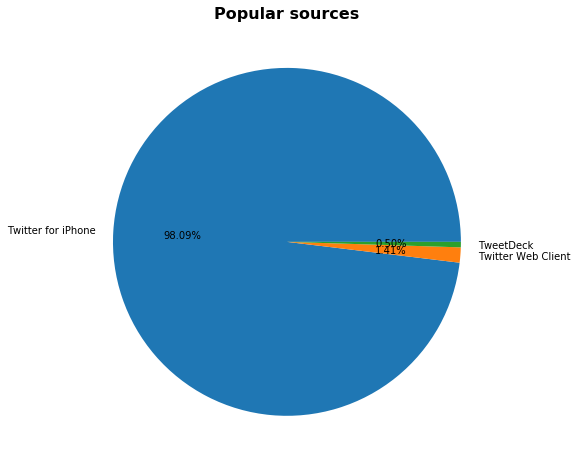

In [61]:
# Shows the repartition of the sources with a pie chart.
sources_count = df['source'].value_counts()
sources_count.sort_values(ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8),)
plt.ylabel('')
plt.title('Popular sources', weight='bold', fontsize=16)
plt.savefig('Popular source.png')

#### Most people post from their iPhone app.

#### Q2. What is the most popular dog stage?

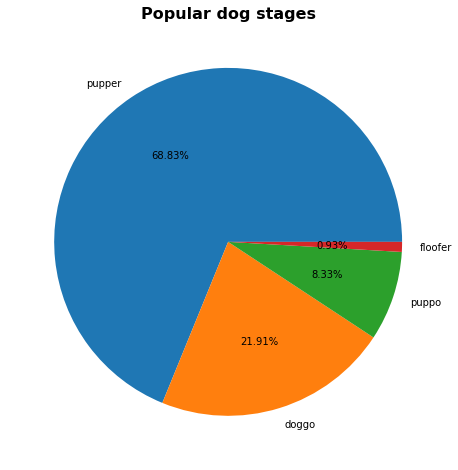

In [62]:
dogstages_count = df['dog_stages'].value_counts()
dogstages_count.sort_values(ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Popular dog stages', weight='bold', fontsize=16)
plt.savefig('Popular DogStages.png')

#### Pupper controls the majority of the dogs market rate.

#### Q3. What is the most preferred dog breed?

In [63]:
p1_count = df['p1'].value_counts().head(10)
p1_count.sort_values(ascending=False).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Popular dog breed', weight='bold', fontsize=16)
plt.savefig('Top Breed.png')

#### Golden retrievers are the most represented breed. Following are labrador retriever, pembroke, chihuahua....

#### Q4. What is the most popular name?

In [64]:
name_count = df['name'].value_counts()
name_count.head(5)

Cooper     10
Charlie    10
Oliver     10
Tucker      9
Lucy        9
Name: name, dtype: int64

#### Charlie, Oliver and Cooper are the most popular names.

#### Q5. What is the tweeting trend over time?

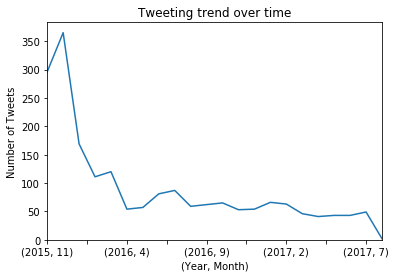

In [65]:
data = df.tweet_id.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).count()
ax = data.plot('line', title='Tweeting trend over time')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )
plt.savefig('tweet_trend.png')

#### The rate of tweeting has declined over time.

#### Q6. Correlation between retweets and likes?

In [66]:
x = df.plot(kind = 'scatter', x = 'favorites', y = 'retweets', alpha = 0.5)
x.grid(False)
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.title('Relationship between Retweets & Likes')
plt.savefig('R&LRelationship.png')

#### As we can notice, there is a positive correlation between Retweets & Likes.

#### Q7. Which is the best dog?

In [67]:
rating_count = df.loc[df['rating'] == '14/10']
best_dog = rating_count.loc[rating_count['retweets'].idxmax() and rating_count['favorites'].idxmax() ]
best_dog

tweet_id                                        819004803107983360
timestamp                                2017-01-11 02:15:36+00:00
source                                          Twitter for iPhone
text             This is Bo. He was a very good First Doggo. 14...
expanded_urls    https://twitter.com/dog_rates/status/819004803...
name                                                            Bo
jpg_url            https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg
img_num                                                          1
p1                                                 standard_poodle
p2                                                      toy_poodle
p3                                                 tibetan_terrier
favorites                                                    90197
retweets                                                     38487
dog_stages                                                     NaN
rating                                                       1

####  Of the 35 top rated dogs, Bo, a Standard Poodle is clearly the overall winner with a combined rating of 14, retweet count of 38,492 and favorite count of 90,204. 